In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Auxiliary

In [2]:
def init_grid(ng):
    return np.random.choice([-1,1], (ng, ng))

def draw_grid(g):
    plt.figure(figsize=(8,6))
    plt.imshow(g)

    plt.show()

# Simulation

Define an order parameter for the simulation as the average spin.

$\langle s \rangle \in [-1, 1]$

In [3]:
def order_param(g):
    '''Calculates average spin for grid.'''
    return np.mean(g)

def dord(sn, so, ng):
    '''Calculates change in order param between old and new states.'''
    return (sn - so)/ng**2

def bin_id(oprm, ng):
    '''Calculates histogram bin for current order parameter.'''
    dm = 2/ng**2
    return np.ceil((oprm + 1 - 0.5*dm)/dm).astype(int)

def roughness(hist):
    '''Measure of flatness of histogram.'''
    mh = np.mean(hist)
    return (np.max(hist - mh))/mh

In [4]:
def delta_energy(g, sn, so, i, j, gam):
    '''Determines change in energy between old and new spin states.'''
    ng = g.shape[0]
    eo = -0.5*gam*so*(g[i, (j+1)%ng] + g[i, (j-1)%ng] + g[(i+1)%ng, j] + g[(i-1)%ng, j])
    en = -0.5*gam*sn*(g[i, (j+1)%ng] + g[i, (j-1)%ng] + g[(i+1)%ng, j] + g[(i-1)%ng, j])
    return en - eo    

In [5]:
def mcSimWL(temp, gam, ns, ng, df0 = 1.0, tol = 0.2):
    fx = []
    
    df = df0
    bins = np.linspace(-1, 1, ng**2 + 1)
    nbins = bins.shape[0]
    
    hn = np.ones(nbins)
    gn = -np.log(hn)
    
    g = init_grid(ng)
    oprm = order_param(g) # Initial order param for random grid
    bo = bin_id(oprm, ng)  # Initial bin ID for random grid
    
    step = 1
    while step <= ns:
        (i, j) = np.random.randint(0, ng, (2))
        
        so = g[i, j]
        sn = (-1)*so # Just flip the sign since only two possibilities
        
        delta_oprm = dord(sn, so, ng)
        bn = bin_id(oprm + delta_oprm, ng) # New bin ID after flip
        
        de = delta_energy(g, sn, so, i, j, gam)
        dewl = de/temp + (gn[bn] - gn[bo]) # Bias potential from WL histogram
        
        if 0 <= bn < nbins:
            accept = True if dewl <= 0 else np.random.rand() < np.exp(-dewl)
            if accept:
                bo = bn # Update bin ID for new order param
                oprm += delta_oprm
                g[i, j] = sn
        
        hn[bo] += 1   # Adjust the histogram by one for new state
        gn[bo] += df  # Adjust the density of states by the log scale factor
        
        if step % ng**2 == 0:
            if roughness(hn) < tol:
                gn = gn - np.max(gn)
                fx.append(np.array([bins, -gn]).T) # Add free energy curve to list
                df *= 0.5
                hn = np.ones(nbins) # Reset histogram
        
        step += 1
        
    return (g, fx)  

# Test

## $\gamma$ = 0.25, T = 1.0

In [756]:
temp = 1.0
gam = 0.25

ns = 10e5
ng = 6

In [757]:
g, fx = mcSimWL(temp, gam, ns, ng)

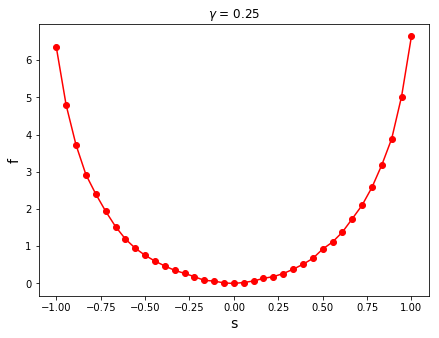

In [759]:
plt.figure(figsize=(7,5))

plt.plot(fx[-1][:, 0], fx[-1][:, 1], '-ro')
plt.title("$\gamma$ = 0.25")
plt.xlabel("s", fontsize=14)
plt.ylabel("f", fontsize=14)

plt.show()

## $\gamma$ = 0.375, T = 1.0

In [6]:
temp = 1.0
gam = 0.375

ns = 10e5
ng = 6

In [7]:
g, fx = mcSimWL(temp, gam, ns, ng)

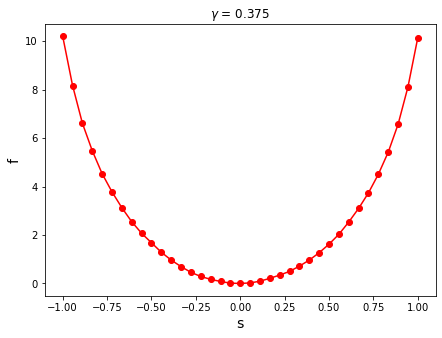

In [8]:
plt.figure(figsize=(7,5))

plt.plot(fx[-1][:, 0], fx[-1][:, 1], '-ro')
plt.title("$\gamma$ = 0.375")
plt.xlabel("s", fontsize=14)
plt.ylabel("f", fontsize=14)

plt.show()

## $\gamma$ = 0.5, T = 1.0

In [761]:
temp = 1.0
gam = 0.5

ns = 10e5
ng = 6

In [762]:
g, fx = mcSimWL(temp, gam, ns, ng)

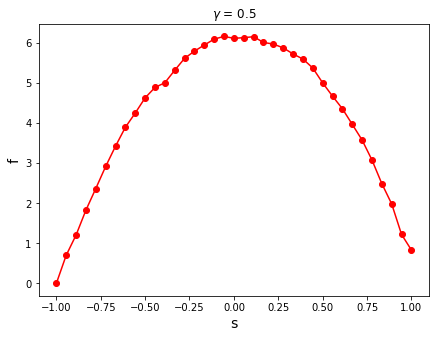

In [763]:
plt.figure(figsize=(7,5))

plt.plot(fx[-1][:, 0], fx[-1][:, 1], '-ro')
plt.title("$\gamma$ = 0.5")
plt.xlabel("s", fontsize=14)
plt.ylabel("f", fontsize=14)

plt.show()